In [1]:
import sys
print(sys.executable)

c:\Users\basil\Anaconda\python.exe


In [2]:
import sys
sys.path.append('../modules')  # go up one folder, then into "modules"

import utils
utils.configure_plotly_template(showlegend=True)

In [3]:
import pandas as pd
df = pd.read_parquet('../statsmodel/AirPassengers_log.parquet').asfreq('ME')
df.columns = ["values"]
series = df["values"]
series.plot()

#### Model fit

In [4]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(endog = series, order =(12,1,1))
model_fit = model.fit()
model_fit.summary()

c:\Users\basil\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 values   No. Observations:                  144
Model:                ARIMA(12, 1, 1)   Log Likelihood                 247.236
Date:                Tue, 09 Sep 2025   AIC                           -466.471
Time:                        22:16:30   BIC                           -424.991
Sample:                    01-31-1949   HQIC                          -449.616
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1026      0.058      1.773      0.076      -0.011       0.216
ar.L2         -0.0662      0.054     -1.219      0.223      -0.173       0.040
ar.L3          0.0007      0.049      0.014      0.989      -0.095       0.097
ar.L4         -0.0556      0.052     -1.076      0.282      -0.157       0.046
ar.L5          0.0388      0.052      0.742      0.458      -0.064       0.141
ar.L6         -0.0277      0.046     -0.605      0.545      -0.118       0.062
ar.L7         -0.0176      0.052     -0.337      0.736      -0.120       0.085
ar.L8         -0.0885      0.052     -1.709      0.088      -0.190       0.013
ar.L9          0.0585      0.058      1.014      0.311      -0.055       0.171
ar.L10        -0.0621      0.055     -1.129      0.259      -0.170       0.046
ar.L11         0.0563      0.050      1.132      0.258      -0.041       0.154
ar.L12         0.8199      0.049     16.665      0.000       0.724       0.916
ma.L1         -0.4288      0.089     -4.805      0.000      -0.604      -0.254
sigma2         0.0016      0.000      7.540      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.96
Prob(Q):                              0.77   Prob(JB):                         0.23
Heteroskedasticity (H):               0.50   Skew:                             0.34
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(endog=series, order=(0,1,1), seasonal_order=(0,1,1,12))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             values   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Tue, 09 Sep 2025   AIC                           -483.393
Time:                                    22:16:31   BIC                           -474.767
Sample:                                01-31-1949   HQIC                          -479.888
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4016      0.073     -5.501      0.000      -0.545      -0.259
ma.S.L12      -0.5563      0.096     -5.776      0.000      -0.745      -0.368
sigma2         0.0013      0.000      9.121      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.84   Prob(JB):                         0.39
Heteroskedasticity (H):               0.58   Skew:                             0.02
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forecast

In [6]:
df_forecast = utils.get_model_forecast(df, 'values', order=(12, 1, 1), horizon=96)
df_forecast = utils.get_model_forecast(df_forecast, 'values', order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), horizon=96)

df_forecast.plot(color="variable")

c:\Users\basil\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



#### Diagnostic and Assumptions

In [8]:
model = SARIMAX(series, order=(0,1,1), seasonal_order=(0,1,1,12))
model_fit = model.fit()

In [9]:
residuals = model_fit.resid[12+1:]
residuals

1950-02-28    0.039164
1950-03-31    0.013906
1950-04-30   -0.015033
1950-05-31   -0.018956
1950-06-30    0.058539
                ...   
1960-08-31   -0.032282
1960-09-30   -0.009665
1960-10-31    0.029522
1960-11-30   -0.027168
1960-12-31   -0.014954
Freq: ME, Length: 131, dtype: float64

##### Autocorrelation

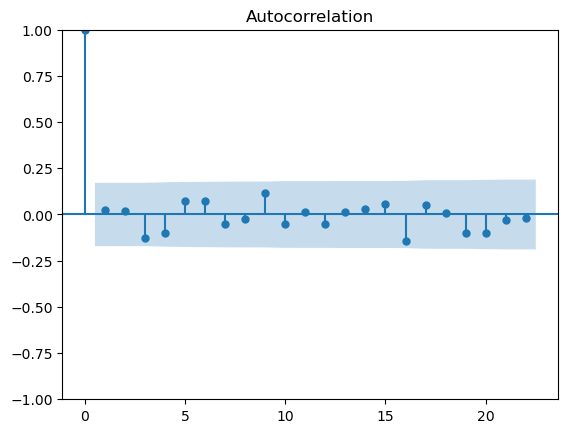

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals);

#### Test

In [13]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags=[10,20,30]).style

,lb_stat,lb_pvalue
10,8.042093,0.624725
20,15.693734,0.735433
30,26.224013,0.663650


#### Normality

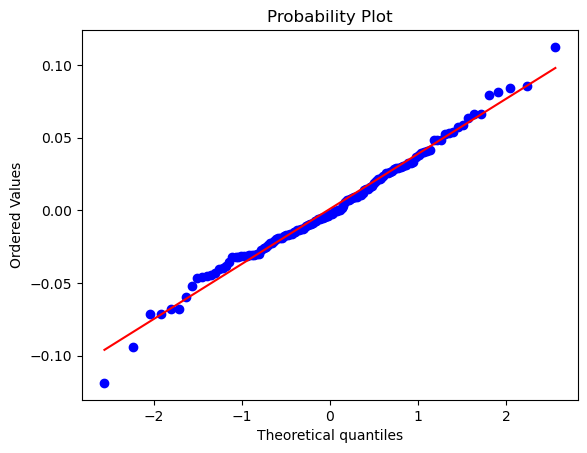

In [17]:
import matplotlib.pyplot as plt
from scipy import stats

fig ,ax = plt.subplots()
stats.probplot(residuals,dist='norm',plot=ax);

#### Test

In [18]:
from scipy.stats import jarque_bera
jarque_bera(residuals)

SignificanceResult(statistic=np.float64(1.7645002730223187), pvalue=np.float64(0.41385064276731154))

#### Homoscedasiticity

#### Plot

In [19]:
residuals.plot()

In [20]:
from statsmodels.stats.diagnostic import het_arch
het_arch(residuals)

(np.float64(13.675221797889025),
 np.float64(0.1883277497842352),
 1.4016096030825114,
 0.1889191124721759)